**INTRODUCTION**
50 Startups data set

This dataset has data collected from New York, California and Florida about 50 business Startups “17 in each state”. The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

columns:

R&D Spend

Administration

Marketing Spend

State

Profit (target variable)

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#read the dataset
df=pd.read_csv("50_CompList.csv")

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.shape

(50, 5)

**Correlation Table**

In [ ]:
# Lets check the correlation between variables
df.corr()
# from below table we can see R&D Spend and Marketing Spend both have good affect in Profit.

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


**Visualization**

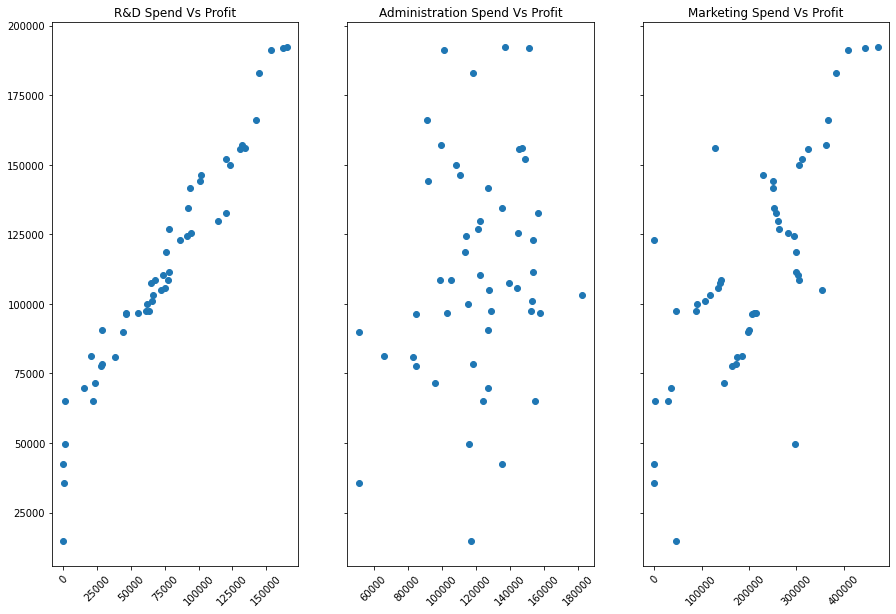

In [ ]:
# Lets plot all the three features together
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 10))

ax1.scatter(df["R&D Spend"], df.Profit)
ax1.set_title('R&D Spend Vs Profit')

ax2.scatter(df["Administration"], df.Profit)
ax2.set_title('Administration Spend Vs Profit')

ax3.scatter(df["Marketing Spend"], df.Profit)
ax3.set_title('Marketing Spend Vs Profit')

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.show()

Means dataset is inclusive of 50 rows and5 columns

**Extracting dependent and independent Variables:**

In [ ]:
X = df.iloc[:,:-1] #independent
y = df.iloc[:,4] #dependent

**Encoding Dummy Variables:**

As we have one categorical variable (State), which cannot be directly applied to the model, so we will encode it.

**Avoiding the Dummy Variable Trap**

The Linear Regression equation would look like —> y=b(0)+b(1)x(1)+b(2)x(2)+b(3)x(3)+b(4)D(1)+b(5)D(2)+b(6)D(3)…b(n+3)D(m-1) Here D(1)…D(m-1) are the m dummy variable’s which we had defined earlier in LabelEncoder and OneHotEncoder. Even though there are m dummy variables we have excluded the last dummy variable D(m) The reason to that is a concept called Dummy Variable Trap in Machine Learning…and to avoid that we must always exclude the last Dummy Variable.

In [ ]:
states = pd.get_dummies(X['State'],drop_first=True)

In [ ]:
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [ ]:
X=X.drop('State',axis=1)

In [ ]:
X

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [ ]:
X=pd.concat([X,states],axis=1)

In [ ]:
X

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


**Encoding Categorical Data**

As long as there are numbers in the dataset, we can easily apply mathematical computations on the dataset and create prediction models. In this dataset, we come across a non-number variable that is “State”. This is also called as categorical data.
We encode this categorical data using another important library called as sklearn. In this, we import the ColumnTransformer and OneHotEncoder. The ColumnTransformer allows a particular column of the DataFrame to be the transformed separately. In our case, we use the OneHotEncoder to transform our “State” column (index=3) to numerical data.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Splitting the dataset into the Training set and Test set**

Importing the Libraries and Applying Cross Validation with 80% data as Training Data and 20% as Test Data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Fitting Multiple Linear Regression to the Training set**

The Linear Regression equation would look like — — > y=b(0)+b(1)x(1)+b(2)x(2)+b(3)x(3)+b(4)D(1)+b(5)D(2)+b(6)D(3)…b(n+3)D(m-1) Importing the Linear Regression Class

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Lets check the correlation between variables
df.corr()
# from below table we can see R&D Spend and Marketing Spend both have good affect in Profit.

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


**Predicting the Test Set results**

In the next step, we are going to predict the profit of the test set using the trained model namely “regressor”. The real values (profits) of the test set data(X_test) is stored in the variable y_test.
We then use the “regressor.predict” function to predict the values for our test data X_test. We assign the predicted values as y_pred. We now have two data, y_test (real values) and y_pred (predicted values).

In [ ]:
#Predicting the Test set results

y_pred = regressor.predict(X_test)

**Comparing the Test Set with Predicted Values**

In this step, we shall print both the values of y_test as Real Values and y_pred values as Predicted Values of each X_test in a Pandas DataFrame. In this way, we obtain the values for all the 10 X_test data.

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
28,103282.38,103015.201598
11,144259.40,132582.277608
10,146121.95,132447.738452
41,77798.83,71976.098513
2,191050.39,178537.482211
27,105008.31,116161.242302
38,81229.06,67851.692097
31,97483.56,98791.733747
22,110352.25,113969.435330
4,166187.94,167921.065695


In the first row, the Real Values has a value of 103282.38 and the Predicted 
Values has a value of 103015.201598. We see that the model has closely predicted this value and hence we can say that our model has a good accuracy.